# 少人数ゲームの計算機シミュレーション

In [1]:
using Plots
using Statistics
include("../src/minority_game.jl")
using .MinorityGame

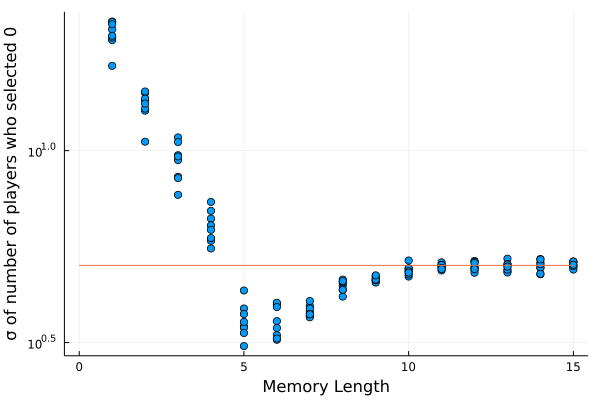

In [2]:
# 各記憶長ごとの0を選んだ人数の標準偏差
let
    TURN_MAX = 1000
    PLAYER_NUMBER = 101
    xs = Int[]
    ys = Float64[]
    for memory_length in (1:15)
        for _ in (1:8)
            players = MinorityGame.create_players(Dict{Int,Int}(memory_length => PLAYER_NUMBER))
            result = MinorityGame.simulate(players,TURN_MAX)
            push!(xs, memory_length)
            push!(ys, std(result[1]))
        end
    end
    scatter(xs,ys,legend=:none)
    xaxis!("Memory Length")
    yaxis!("σ of number of players who selected 0",:log10)
    plot!([0,15],_->sqrt(0.5*0.5*PLAYER_NUMBER)) # 行動0,1をそれぞれ50%の確率で選んだ場合の標準偏差(二項分布)
end